In [1]:
from sklearn.datasets import fetch_kddcup99
kdd99_data = fetch_kddcup99(subset='http')
import numpy as np
X = kdd99_data['data']
y = kdd99_data['target']
y[y == b'normal.'] = 1
y[y != 1] = -1
y = np.int64(y)

In [2]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import recall_score

recall_scores = []

def calculations(n):
    print('K value: ', n)
    lof = LocalOutlierFactor(n_neighbors = n)
    anomaly_predictions = lof.fit_predict(X)
    
  
    anomaly_predictions = np.array(anomaly_predictions)
    print(recall_score(y, anomaly_predictions, pos_label = -1))
    
    recall_scores.append(recall_score)

In [3]:
ilist = []
i = 1
while i<5:
    print('-----------------------------------------------------------------')
    calculations(i)
    ilist.append(i)
    i=i+1

-----------------------------------------------------------------
K value:  1
0.010864644635581712
-----------------------------------------------------------------
K value:  2
0.015844273426889995
-----------------------------------------------------------------
K value:  3
0.013580805794477138
-----------------------------------------------------------------
K value:  4
0.012675418741511997


Here, I am able to see the n_nearest neighbors value along with the recall score associated with that value. The ilist array has all of the values of K, and the recall_scores list should ideally contain the values for the recall score. However, here is what is stored instead:

In [5]:
print('List of K: ', ilist)
print('List of Recall Scores: ', recall_scores)

List of K:  [1, 2, 3, 4]
List of Recall Scores:  [<function recall_score at 0x1EA13970>, <function recall_score at 0x1EA13970>, <function recall_score at 0x1EA13970>, <function recall_score at 0x1EA13970>]


And thus I get an error if I try to plot

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ilist, recall_scores)
plt.xlabel('Value of K')
plt.ylabel('Recall Score')
plt.title('Recall Plot')
plt.show()

However, if I manually supply the recall_scores list, the plot works fine. 

In [6]:
recall_scores = [0.0108, 0.01580, 0.0135, 0.0126]

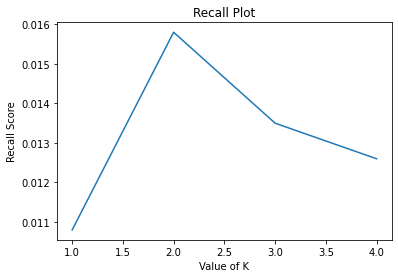

In [7]:
import matplotlib.pyplot as plt
plt.plot(ilist, recall_scores)
plt.xlabel('Value of K')
plt.ylabel('Recall Score')
plt.title('Recall Plot')
plt.show()